Constance Delannoy

APPM 4650 | Homework 5

July 24, 2020

In [17]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="The raw code is by default hidden for easier reading."></form>''')

__Question 1__

TBD

__Question 2__

In [181]:
def sor(a, b, x0, w, tol, iters):
    """This function performs Gauss-Steidel with relaxation as described in the homework Q2.
    
    Keyword arguments:
    a -- matrix A
    b -- matrix B
    x0 -- initial value of vector X
    w -- relaxation parameter
    tol -- tolerance
    iters -- number of times -1 to run algorithm
    """
    
    k = 0
    n = len(x0)
    x=[None]*3
    
    while k <= iters:
        for i in range(n):
            sum1 = 0
            sum2 = 0
            
            for j in range(i):
                sum1 += a[i,j]*x[j]
                
            for j in range(i, n):
                sum2 += a[i,j]*x0[j]

            x[i] = x0[i] + (w/a[i,i])*(b[i] - sum1 - sum2)
            
        if abs(x[i]-x0[i]) < tol:
            #print('convergence achieved')
            break
                
        if k == iters:
            #print('maximum number of iterations achieved')
            break
                
        k += 1
        for i in range(n):
            x0[i] = x[i]
            
    return x, k

In [182]:
A = np.matrix([[4,3,0],[3,4,-1],[0,-1,4]])
X = [0,0,0]
B = [24/4, 30/4, -24/4]

In [184]:
res = []
iters = []
omegas1 = np.arange(-2, 0, 0.25).tolist()
omegas2 = np.arange(0.25, 2.25, 0.25).tolist()
omegas = omegas1 + omegas2

for v in omegas:
    A = np.matrix([[4,3,0],[3,4,-1],[0,-1,4]])
    X = [0,0,0]
    B = [24/4, 30/4, -24/4]
    x_sol, num_iters = sor(A, B, X, v, 10**(-6), 100)
    res.append(x_sol)
    iters.append(num_iters)

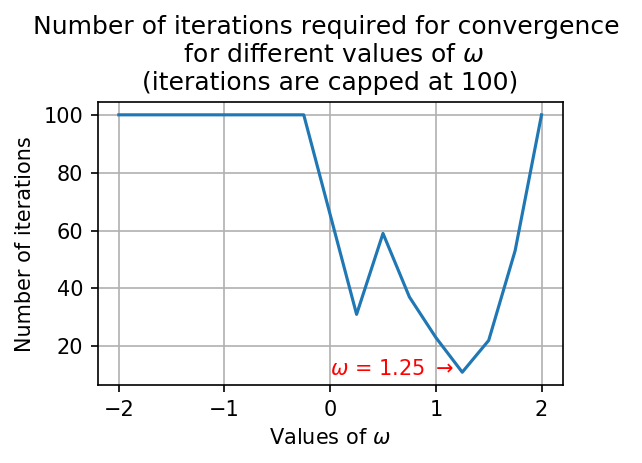

In [194]:
fig1 = plt.figure(figsize = (4, 2.5), dpi = 150)
ax1 = fig1.add_subplot(1, 1, 1)

ax1.grid(b=True, which='major', linestyle='-')
ax1.plot(omegas, iters)
ax1.legend()
ax1.set_xlabel(r'Values of $\omega$')
ax1.set_ylabel('Number of iterations')
ax1.set_title('Number of iterations required for convergence \n for different values of ' + r'$\omega$' + '\n(iterations are capped at 100)')
ax1.text(0, 10, r'$\omega$ = 1.25 $\rightarrow$', color = 'r')

plt.show()

Based on this graph, the optimal value of $\omega$ is 1.25, which results in only 11 iterations.

The results provide the following $x$ vector with $10^{-6}$ precision:

In [200]:
res[-4]

[0.74999967856796379, 1.0000001229627169, -1.249999891502606]

__Question 3__

(a) We have the following matrix at hand:

$$
A = \begin{pmatrix}
   3 & 0 & 1 \\
   0 & 5 & 0 \\
   -1 & 1 & -1 \\
\end{pmatrix}
$$

We start by calculating its minor $M$

$$
M = \begin{pmatrix}
   -5-0 & 0 & 0+5 \\
   0 -1 & -3+1 & 3-0 \\
   0-5 & 0 & 15-0 \\
\end{pmatrix}
=
\begin{pmatrix}
   -5 & 0 & 5 \\
   -1 & -2 & 3 \\
   -5 & 0 & 15 \\
\end{pmatrix}
$$

We now find the corresponding matrix of cofactors $C$:

$$
C = \begin{pmatrix}
   -5 & 0 & 5 \\
   1 & -2 & -3 \\
   -5 & 0 & 15 \\
\end{pmatrix}
$$

From $C$, we find the Adjugate matrix that we call $C^T$ by transposing C:

$$
C^T = \begin{pmatrix}
   -5 & 1 & -5 \\
   0 & -2 & 0 \\
   5 & -3 & 15 \\
\end{pmatrix}
$$

Finally, we compute the determinant of the original matrix $A$:

$detA = 3(-5-0) + 0 + 1(0+5) = -10$

We can now at last compute the inverse of $A$:

$$
A^{-1} = \begin{pmatrix}
   0.5 & -0.1 & 0.5 \\
   0 & 0.2 & 0 \\
   -0.5 & 0.3 & -1.5 \\
\end{pmatrix}
$$

(b)

In [203]:
def matrixIter(x0, A):
    """
    This function returns the next iteration of the inverse of a matrix
    based on an initial guess x0 and the original matrix A.
    
    x0 --- initial matrix inverse guess of size 3x3
    A --- original matrix of size 3x3
    """
    
    I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
    
    return x0*(2*I - A*x0)

In [207]:
X0 = np.matrix([[0.5, -0.1, 0.4],[0, 0.2, 0],[-0.4, 0.3, -1.5]])
A = np.matrix([[3, 0, 1],[0, 5, 0],[-1, 1, -1]])

In this case, we use the initial guess 

$$
x_0 = \begin{pmatrix}
   0.5 & -0.1 & 0.4 \\
   0 & 0.2 & 0 \\
   -0.4 & 0.3 & -1.5 \\
\end{pmatrix}
$$

and find the following result for $x_1$:

In [209]:
matrixIter(X0, A)

matrix([[ 0.49, -0.1 ,  0.51],
        [ 0.  ,  0.2 ,  0.  ],
        [-0.51,  0.3 , -1.47]])

(c) **IS THIS RIGHT??**

To find the deviation of $x_0$ and $x_1$ from $A^{-1}$, we first compute the mean of each column of $A^{-1}$. Here, $\bar{A^-1}_i$ denotes the mean from the $ith$ column.

$\bar{A^{-1}_1} = \frac{0.5 + 0 - 0.5}{3} = 0$

$\bar{A^{-1}_2} = \frac{-0.1 + 0.2 + 0.3}{3} = 0.133333$

$\bar{A^{-1}_2} = \frac{0.5 + 0 - 1.5}{3} = -0.333333$

Based on these numbers, we infer the resulting deviation matrices $D_0$ for $x_0$ and $D_1$ for $x_1$:

$$
D_0 = \begin{pmatrix}
   0.5 - 0 & -0.1 - 0.133333 & 0.4 + 0.333333 \\
   0 - 0 & 0.2 - 0.133333 & 0 + 0.333333 \\
   -0.4 - 0 & 0.3 - 0.133333 & -1.5 + 0.333333 \\
\end{pmatrix}
= 
\begin{pmatrix}
   0.5 & -0.23334 & 0.06667 \\
   0 & 0.66667 & 0.333333 \\
   -0.4 & 0.16666 & -1.83333 \\
\end{pmatrix}
$$

$$
D_1 = \begin{pmatrix}
   0.49 - 0 & -0.1 - 0.133333 & 0.51 + 0.333333 \\
   0 - 0 & 0.2 - 0.133333 & 0 + 0.333333 \\
   -0.51 - 0 & 0.3 - 0.133333 & -1.47 + 0.333333 \\
\end{pmatrix}
= 
\begin{pmatrix}
   0.49 & -0.23334 & 0.17667 \\
   0 & 0.66667 & 0.333333 \\
   -0.51 & 0.16666 & -1.80333 \\
\end{pmatrix}
$$

We note that $x_1$ overshot some of the answers but is closer to the true value of $A^{-1}$ when considering all each column at once.

In [220]:
#0.3 - (-0.1+0.2+0.3)/3
#0.51 + (0.5+0-1.5)/3

0.1766666666666667